# Introduction
Using CNN to predict malaria from about 10000 cells

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt


In [0]:
print(tf.__version__)

2.2.0-rc3


PLOTTING A PARASITE CELL

In [7]:
image1 = plt.imread(fname='/content/drive/My Drive/colab data/train/Parasitized/C33P1thinF_IMG_20150619_120804a_cell_224.png')

OSError: ignored

In [0]:
image1.shape

(50, 50)

In [0]:
print('Min value {:0.2}'.format(image1.min()))
print('Max value {:0.2}'.format(image1.max()))

Min value 0.0
Max value 0.81


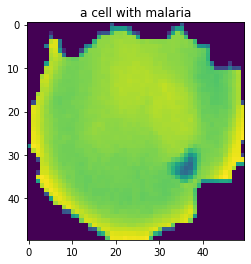

In [0]:
plt.imshow(image1)
plt.title(label='a cell with malaria')
plt.show()

In [0]:
image2 = plt.imread('/content/drive/My Drive/colab data/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_191.png')

image2.shape

(50, 50)

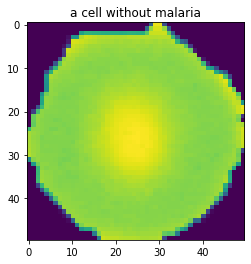

In [0]:
plt.imshow(image2)
plt.title('a cell without malaria')
plt.show()

In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 50
IMG_WIDTH = 50
CLASS_NAMES = ['parasitic','uninfected']

The C.N.N Model

In [0]:
train_generator = ImageDataGenerator() 
validation_generator = ImageDataGenerator() 

In [0]:
train_data_gen = train_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/drive/My Drive/colab data/train',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 22070 images belonging to 2 classes.


In [0]:
val_data_gen = validation_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='/content/drive/My Drive/colab data/valid',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 5512 images belonging to 2 classes.


In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

PREPROCESSING THE DATA USING THE IMAGE DATA GENERATOR

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = 2000,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = 200
)

NameError: ignored